The business objective is to build a predictive model that would help identify customers who would less likely default on a future loan. 

In [1]:
#Importing libraries
import pandas as pd 
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from scipy import stats 
%matplotlib inline
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loantrainingset.csv')

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
#Fixed the columns for consistency with the rest of the DataFrame
df.rename(columns={'Years in current job':'Years in Current Job', 
                   'Months since last delinquent': 'Months Since Last Delinquent'}, inplace=True)

In [5]:
#Replaces the spaces to make it easier to code in Python
df.columns = [x.replace(' ','_') for x in df.columns]

In [6]:
#Looking at the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan_ID                         256984 non-null object
Customer_ID                     256984 non-null object
Loan_Status                     256984 non-null object
Current_Loan_Amount             256984 non-null int64
Term                            256984 non-null object
Credit_Score                    195308 non-null float64
Years_in_Current_Job            245508 non-null object
Home_Ownership                  256984 non-null object
Annual_Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly_Debt                    256984 non-null object
Years_of_Credit_History         256984 non-null float64
Months_Since_Last_Delinquent    116601 non-null float64
Number_of_Open_Accounts         256984 non-null int64
Number_of_Credit_Problems       256984 non-null int64
Current_Credit_Balance          256984 non-null int64
Maximum_O

In [7]:
df.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


From looking at the some of these columns, there are incorrect inputs and some very large outliers. We will examine them later.
* The maximum value of Credit Score is 7510, when the maximum score of Credit Score for the data is 800.
* Current Loan Amount, Years of Credit History, Number of Open Accounts, Number of Credit Problems, Bankruptcies, and Tax Liens have very large outliers. 

# 1. Finding Duplicate Data and Deleting It 

In [8]:
#Finding Duplicate Data 
df[df['Loan_ID'].duplicated() == True]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
14,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
15,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,701.0,< 1 year,Own Home,53112.0,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
19,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6 years,Home Mortgage,35315.0,Debt Consolidation,$662.16,15.0,NaN,12,0,17092,20743,0.0,0.0
21,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,734.0,3 years,Home Mortgage,40308.0,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
32,0006572c-9567-484d-b49b-bfe06536aa96,c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954,Charged Off,14727,Short Term,740.0,3 years,Home Mortgage,70690.0,Debt Consolidation,"$1,083.91",18.0,27.0,12,0,43375,225911,0.0,0.0
37,000795b0-d767-42bf-837a-80d5b78c1e50,b533c78c-3096-4914-acb1-5453c0ff76a4,Charged Off,19731,Long Term,623.0,3 years,Rent,43846.0,Buy House,$738.08,16.2,55.0,13,1,9031,17955,1.0,0.0
40,0008a65c-3054-4b5d-931d-8352021f813d,04513d99-d809-4eb6-b4bb-6abc767d861e,Charged Off,7066,Short Term,741.0,10+ years,Own Home,60564.0,Debt Consolidation,$706.58,14.6,56.0,4,0,6229,9242,0.0,0.0
47,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,Charged Off,21160,Long Term,636.0,5 years,Home Mortgage,77770.0,Debt Consolidation,"$1,290.98",20.8,NaN,28,0,28175,51227,0.0,0.0


In [9]:
#Used to check if Customer ID and Loan ID had the same amount of duplicated rows 
df[df['Customer_ID'].duplicated() == True]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
14,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
15,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,701.0,< 1 year,Own Home,53112.0,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
19,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6 years,Home Mortgage,35315.0,Debt Consolidation,$662.16,15.0,NaN,12,0,17092,20743,0.0,0.0
21,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,734.0,3 years,Home Mortgage,40308.0,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
32,0006572c-9567-484d-b49b-bfe06536aa96,c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954,Charged Off,14727,Short Term,740.0,3 years,Home Mortgage,70690.0,Debt Consolidation,"$1,083.91",18.0,27.0,12,0,43375,225911,0.0,0.0
37,000795b0-d767-42bf-837a-80d5b78c1e50,b533c78c-3096-4914-acb1-5453c0ff76a4,Charged Off,19731,Long Term,623.0,3 years,Rent,43846.0,Buy House,$738.08,16.2,55.0,13,1,9031,17955,1.0,0.0
40,0008a65c-3054-4b5d-931d-8352021f813d,04513d99-d809-4eb6-b4bb-6abc767d861e,Charged Off,7066,Short Term,741.0,10+ years,Own Home,60564.0,Debt Consolidation,$706.58,14.6,56.0,4,0,6229,9242,0.0,0.0
47,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,Charged Off,21160,Long Term,636.0,5 years,Home Mortgage,77770.0,Debt Consolidation,"$1,290.98",20.8,NaN,28,0,28175,51227,0.0,0.0


Since both Loan ID and Customer ID had the same amount of duplicated data, we can delete the the extra data to help train the predictive model. 

In [10]:
#Going to use Loan ID to delete duplicate rows 
df = df[df['Loan_ID'].duplicated() == False]

In [11]:
#Checking if there are duplicates
df['Loan_ID'].value_counts().head(10)

c890b38d-ba5e-4f6e-a28f-17e6fdd52c56    1
f03b21a5-274d-4ec4-a0ba-edeacacc3171    1
bb0eeef2-d45f-4049-a2fd-ac395642d66b    1
abafea52-bf15-4f20-991b-d843a79da19d    1
fc42af35-91b7-4e95-925b-5e0834f1b7af    1
03e180a5-9104-42e0-899d-d0c58b775af8    1
c90c0201-3a5f-457d-a388-18d0519a4236    1
2e1ebfec-adce-458c-aa1a-72af33b3d3f4    1
a29354fd-c2d1-43fc-82f6-d3d8a29640e3    1
97226447-e728-4fac-ba38-5ded0a8d6947    1
Name: Loan_ID, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
Loan_ID                         215700 non-null object
Customer_ID                     215700 non-null object
Loan_Status                     215700 non-null object
Current_Loan_Amount             215700 non-null int64
Term                            215700 non-null object
Credit_Score                    160692 non-null float64
Years_in_Current_Job            206710 non-null object
Home_Ownership                  215700 non-null object
Annual_Income                   160692 non-null float64
Purpose                         215700 non-null object
Monthly_Debt                    215700 non-null object
Years_of_Credit_History         215700 non-null float64
Months_Since_Last_Delinquent    97438 non-null float64
Number_of_Open_Accounts         215700 non-null int64
Number_of_Credit_Problems       215700 non-null int64
Current_Credit_Balance          215700 non-null int64
Maximum_Op

# 2 Checking for Spelling and Data Values

## 2. 1 Loan Status 

In [13]:
#Checking the spelling of Loan Status
df['Loan_Status'].value_counts() 

Fully Paid     176191
Charged Off     39509
Name: Loan_Status, dtype: int64

## 2.2 Current Loan Amount

In [14]:
#Very large value disrepcency of 99,999,999 
df['Current_Loan_Amount'].value_counts().head(10) 

99999999    35210
9793           50
9820           48
5920           43
10192          43
10137          42
9941           42
10096          42
9781           42
10132          42
Name: Current_Loan_Amount, dtype: int64

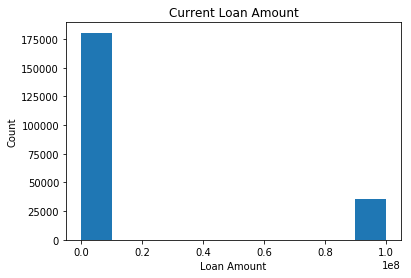

In [15]:
plt.hist(df.Current_Loan_Amount, bins=10)
plt.title('Current Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count');

## 2.3 Term

In [16]:
df['Term'].value_counts()

Short Term    166523
Long Term      49177
Name: Term, dtype: int64

## 2.4 Credit Score

In [17]:
df[df['Credit_Score'] > 800]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
55,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463,Short Term,7320.0,1 year,Own Home,25248.0,Debt Consolidation,$633.29,19.9,74.0,9,0,8025,24317,0.0,0.0
71,000f1140-ef9f-42f9-9898-f9b3162bf0da,442c2d9b-3d95-44a9-bcb4-0dc80a941e3c,Charged Off,6007,Short Term,7180.0,10+ years,Home Mortgage,43052.0,Debt Consolidation,$538.15,23.6,13.0,6,0,5077,7811,0.0,0.0
73,000f5c35-dc3e-415f-9c22-e355ef96d78b,0ecf29b6-93eb-4c13-b853-a9cbdfc7f85b,Charged Off,12899,Long Term,6670.0,2 years,Rent,133947.0,Debt Consolidation,"$1,931.07",18.4,7.0,16,0,39417,90199,0.0,0.0
79,001227a1-4490-47c6-ada7-20faf636e9a3,3d4a8985-0b72-4084-8b20-f441d9868483,Charged Off,5060,Short Term,7270.0,< 1 year,Home Mortgage,62738.0,Other,$711.03,20.4,22.0,6,0,10777,12041,0.0,0.0
84,00158423-d7a4-4fef-8e0d-ad8de93e8ba1,11e878dc-0982-4c6b-a32a-ef5fca6ed6f4,Charged Off,11546,Long Term,7070.0,9 years,Rent,33551.0,Debt Consolidation,$522.84,22.7,NaN,17,0,12113,15630,0.0,0.0
88,00163613-1360-4e43-8fbc-7818032510b7,2eba693e-f810-459d-8df7-9a2376138466,Charged Off,5041,Short Term,7370.0,2 years,Rent,51147.0,Debt Consolidation,$613.77,10.9,NaN,11,0,3644,4428,0.0,0.0
112,001ce813-522a-4a34-bbcc-21eaeae79aea,cc73a15c-7ad4-4101-a2af-57306c335285,Charged Off,15306,Long Term,7060.0,7 years,Rent,45204.0,Debt Consolidation,$388.00,14.0,NaN,11,0,15774,24999,0.0,0.0
126,00205bb2-b17c-4001-84ac-c6d928e4eaa6,45aa9267-04f2-49b5-8991-7bb1ffc8f669,Charged Off,14834,Short Term,7410.0,3 years,Home Mortgage,98890.0,Debt Consolidation,"$2,398.08",16.0,12.0,8,0,5810,5736,0.0,0.0
133,00221528-22cc-422d-ace3-71a4c5a43e59,79791672-07e1-423e-bc3e-beecee96e4a6,Charged Off,3278,Short Term,7330.0,NaN,Rent,39948.0,Medical Bills,$581.90,21.5,78.0,10,0,10392,14042,0.0,0.0


There are 14,433 values that have credit scores of above 800. To fix it, we apply a lambda to the credit scores that are higher than 800. 

In [18]:
df.Credit_Score[df['Credit_Score'] > 800] = df['Credit_Score'].apply(lambda x: x/10)

In [19]:
df['Credit_Score'].describe()

count    160692.000000
mean        723.565983
std          26.332509
min         585.000000
25%         713.000000
50%         732.000000
75%         742.000000
max         751.000000
Name: Credit_Score, dtype: float64

## 2.5 Years in Current Job

In [20]:
df['Years_in_Current_Job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

We will need to format the data so the data can be numerical and help us with our prediction. There are also missing values in Years in Current Job.

In [21]:
df['Years_in_Current_Job'].value_counts()

10+ years    66711
2 years      19831
< 1 year     17544
3 years      17428
5 years      14987
1 year       14130
4 years      13632
6 years      12230
7 years      11713
8 years      10232
9 years       8272
Name: Years_in_Current_Job, dtype: int64

In [22]:
#Convert categorical data to numerical data 
y = {'10+ years': 10, '9 years': 9,
     '8 years': 8, '7 years': 7,
     '6 years': 6, '5 years': 5,
     '4 years': 4, '3 years': 3,
     '2 years': 2, '1 year': 1,
    '< 1 year': 0.5}

In [23]:
df['Years_in_Current_Job'] = df['Years_in_Current_Job'].map(y) 

In [24]:
df['Years_in_Current_Job'].value_counts()

10.0    66711
2.0     19831
0.5     17544
3.0     17428
5.0     14987
1.0     14130
4.0     13632
6.0     12230
7.0     11713
8.0     10232
9.0      8272
Name: Years_in_Current_Job, dtype: int64

## 2.6 Home Ownership

In [25]:
#Notice HaveMortgage does not have a space
df['Home_Ownership'].value_counts() 

Home Mortgage    106492
Rent              89619
Own Home          19094
HaveMortgage        495
Name: Home_Ownership, dtype: int64

The values from our understanding were "Rent", "Home Mortgage", and "Own Home". We can categorize HaveMortgage to Home Mortgage. 

In [26]:
df['Home_Ownership'] = df['Home_Ownership'].map(lambda x: 'Home Mortgage' if x== 'HaveMortgage' else x)

In [27]:
df['Home_Ownership'].value_counts()

Home Mortgage    106987
Rent              89619
Own Home          19094
Name: Home_Ownership, dtype: int64

## 2.7 Purpose

In [28]:
df['Purpose'].value_counts()

Debt Consolidation      171096
Home Improvements        12840
other                    11726
Other                     8281
Business Loan             3611
Buy a Car                 2926
Medical Bills             2375
Take a Trip               1312
Buy House                 1308
Educational Expenses       225
Name: Purpose, dtype: int64

There are different capilizations of other/Other. We need to keep it consistent by fixing the capitalization of "other." 

In [29]:
df['Purpose'] = df['Purpose'].map(lambda x: 'Other' if x== 'other' else x)

In [30]:
df['Purpose'].value_counts()

Debt Consolidation      171096
Other                    20007
Home Improvements        12840
Business Loan             3611
Buy a Car                 2926
Medical Bills             2375
Take a Trip               1312
Buy House                 1308
Educational Expenses       225
Name: Purpose, dtype: int64

## 2.8 Monthly Debt

In [31]:
df['Monthly_Debt'].head(10)
#Data has Currency 

0        $584.03
1     $1,106.04 
2     $1,321.85 
3        $751.92
4        $355.18
5        $561.52
6        $542.29
8        $386.36
9        $741.79
10       $582.84
Name: Monthly_Debt, dtype: object

In Monthly Debt, the data will be formatted into numerical data by removing the dollar sign and the comma. 

In [32]:
df['Monthly_Debt'] = df.Monthly_Debt.apply(lambda x:x.replace('$',''))
df['Monthly_Debt'] = df.Monthly_Debt.apply(lambda x:x.replace(',',''))

In [33]:
df['Monthly_Debt'].astype(float).head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: Monthly_Debt, dtype: float64

## 2.9 Current Credit Balance

In [34]:
df['Current_Credit_Balance'].value_counts().head()

0        1349
10168      24
3420       24
10228      23
7572       23
Name: Current_Credit_Balance, dtype: int64

## 2.10 Maximum Open Credit 

In [35]:
df['Maximum_Open_Credit'].value_counts().head()
#There are two different zeroes for values 

0        1381
0         206
10198      15
15662      15
7067       14
Name: Maximum_Open_Credit, dtype: int64

## 2.11 Bankruptcies

In [36]:
df['Bankruptcies'].value_counts()

0.0    192727
1.0     21506
2.0       818
3.0       155
4.0        25
5.0        13
6.0         3
7.0         1
Name: Bankruptcies, dtype: int64

## 2.12 Tax Liens 

In [37]:
df['Tax_Liens'].value_counts()

0.0     211881
1.0       2701
2.0        707
3.0        195
4.0         97
5.0         48
6.0         26
8.0          7
7.0          6
9.0          5
10.0         3
11.0         2
Name: Tax_Liens, dtype: int64

# 3 Filling in Missing Values

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
Loan_ID                         215700 non-null object
Customer_ID                     215700 non-null object
Loan_Status                     215700 non-null object
Current_Loan_Amount             215700 non-null int64
Term                            215700 non-null object
Credit_Score                    160692 non-null float64
Years_in_Current_Job            206710 non-null float64
Home_Ownership                  215700 non-null object
Annual_Income                   160692 non-null float64
Purpose                         215700 non-null object
Monthly_Debt                    215700 non-null object
Years_of_Credit_History         215700 non-null float64
Months_Since_Last_Delinquent    97438 non-null float64
Number_of_Open_Accounts         215700 non-null int64
Number_of_Credit_Problems       215700 non-null int64
Current_Credit_Balance          215700 non-null int64
Maximum_O

 ## 3. 1 Years in Current Job Missing Values

In [39]:
df.loc[df['Years_in_Current_Job'].isnull()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,Fully Paid,2036,Short Term,733.0,NaN,Home Mortgage,55985.0,Debt Consolidation,741.79,19.8,29.0,7,0,10926,15676,0.0,0.0
38,0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,Fully Paid,6114,Short Term,NaN,NaN,Home Mortgage,NaN,Debt Consolidation,206.97,17.8,21.0,8,1,5772,13975,1.0,0.0
57,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,7068,Short Term,NaN,NaN,Own Home,NaN,Other,425.68,21.3,NaN,7,1,4178,6850,1.0,0.0
94,001775be-defd-4c40-bda8-54edb5279848,75cd8e2e-2f86-459a-a719-e9f8384df817,Fully Paid,99999999,Short Term,675.0,NaN,Own Home,36549.0,Debt Consolidation,444.68,14.2,NaN,7,0,18193,21329,0.0,0.0
95,0017ddc4-0232-441e-a01d-6b5bb67d0cc8,7668401c-2bf7-4edd-8233-c910d87fc0ca,Fully Paid,1971,Short Term,746.0,NaN,Home Mortgage,39420.0,Home Improvements,768.69,22.0,43.0,7,0,8256,17163,0.0,0.0
133,00221528-22cc-422d-ace3-71a4c5a43e59,79791672-07e1-423e-bc3e-beecee96e4a6,Charged Off,3278,Short Term,733.0,NaN,Rent,39948.0,Medical Bills,581.90,21.5,78.0,10,0,10392,14042,0.0,0.0
203,0033afa0-9ee0-4b80-8583-84fd5df32cdd,cdfc5fc0-0107-4770-b66d-dcfac1f08a38,Charged Off,9931,Long Term,NaN,NaN,Rent,NaN,Other,743.04,23.0,NaN,9,0,3711,12011,0.0,0.0
334,00537c53-f285-49e1-9902-65c484f626b8,f47d8749-ff8c-4cdf-be35-9425ac1883ce,Fully Paid,5619,Short Term,719.0,NaN,Home Mortgage,38957.0,Debt Consolidation,229.85,15.1,9.0,11,1,3586,11103,1.0,0.0
335,0053c028-19d9-4239-a0cd-e4a529d97632,b982eb00-3d9c-441b-9530-6531b193419e,Fully Paid,19888,Short Term,744.0,NaN,Own Home,74580.0,Home Improvements,615.29,13.4,NaN,7,0,15538,29043,0.0,0.0
337,00541caf-221a-40f6-a992-da15219c0af2,a4d67fc2-f554-42c0-9aee-6749459d39d1,Fully Paid,5494,Short Term,NaN,NaN,Rent,NaN,Debt Consolidation,171.86,23.4,28.0,7,0,4526,8589,0.0,0.0


Text(0, 0.5, 'Count')

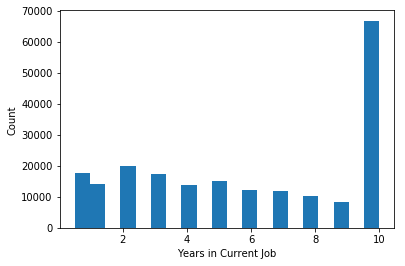

In [40]:
x = df['Years_in_Current_Job']
plt.hist(x, bins= 20);
plt.xlabel('Years in Current Job')
plt.ylabel('Count')

I noticed there were no zeroes, so NaN can be filled in as zero. 

In [41]:
#Fill in Missing Values
df['Years_in_Current_Job'].fillna(0 , inplace=True)

## 3.2 Bankruptcies Missing Values

In [42]:
df['Bankruptcies'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  7.,  6.])

In [43]:
df.loc[df['Bankruptcies'].isnull()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
119,001eb42c-2b5b-4640-bf9d-8c086a1076f4,9377bba7-2cab-4478-91c2-a3ff2904638d,Fully Paid,12128,Short Term,747.0,7.0,Home Mortgage,90963.0,Debt Consolidation,123.56,24.1,0.0,6,0,4406,28795,NaN,0.0
183,002dc37f-f6b5-4113-8d5c-53c25ac6111e,647fd091-0705-4a01-9da6-e57c427562f0,Fully Paid,5006,Short Term,749.0,0.5,Own Home,45054.0,Debt Consolidation,42.05,25.0,0.0,5,0,1785,0,NaN,NaN
198,0032e3fa-57eb-481c-8622-93474261fa58,96328109-568d-42fc-88e5-8fc876de4922,Fully Paid,99999999,Short Term,697.0,2.0,Home Mortgage,50220.0,Debt Consolidation,853.74,29.6,15.0,13,0,12628,17588,NaN,0.0
217,00383da1-20b2-4d18-bfbb-2621b01eee08,dd532c7c-d95b-4bb0-bfef-b103143120f8,Fully Paid,9451,Short Term,736.0,1.0,Rent,57698.0,Debt Consolidation,1053.00,21.2,31.0,20,0,26082,90877,NaN,0.0
225,003a3241-adbe-4337-b73a-5085c6834a74,08117601-9319-41e3-9fa6-6da917c70fa5,Charged Off,7253,Short Term,744.0,0.5,Rent,45329.0,Debt Consolidation,30.22,15.9,0.0,4,0,3356,10968,NaN,0.0
385,00603463-baa7-403d-ae74-752eee57d711,45fbec08-da53-44c1-a196-be3c6e794028,Fully Paid,8301,Short Term,747.0,9.0,Home Mortgage,49157.0,Other,405.13,35.8,0.0,14,0,7769,45432,NaN,0.0
2498,0291075e-9152-40d8-8fb9-2cbe6628b266,5bf58b9d-8be9-40b2-981b-828b2d79bdf8,Fully Paid,4089,Short Term,NaN,10.0,Home Mortgage,NaN,Home Improvements,309.86,23.4,0.0,9,0,790,16462,NaN,0.0
2937,0302ccc1-e514-459e-88b0-88db890299d9,0fb77c3a-0dea-4814-86de-5684989d8c03,Fully Paid,7633,Short Term,746.0,1.0,Home Mortgage,152655.0,Home Improvements,346.02,23.2,0.0,15,0,24097,98759,NaN,NaN
4398,04740553-adb3-4f67-9a98-16d1021d3cca,2d2f1e97-b295-4eff-be7a-d65aecbe2a64,Fully Paid,5901,Short Term,740.0,1.0,Rent,39340.0,Debt Consolidation,531.09,15.9,0.0,5,0,15340,25566,NaN,0.0
4709,04bcbea2-2944-42cd-9f4d-6a7c23b4e9db,fdd55fc4-8cb1-4afa-b4a7-aef61f4cc0e7,Fully Paid,12656,Short Term,NaN,0.5,Rent,NaN,Debt Consolidation,361.46,16.7,0.0,9,0,8480,9318,NaN,0.0


In [44]:
bankrupt = df.loc[df['Bankruptcies'].isnull()]

In [45]:
bankrupt['Number_of_Credit_Problems'].value_counts()

0    439
1     13
Name: Number_of_Credit_Problems, dtype: int64

Since the missing values do not have many credit problems, I will fill in the missing data for Bankruptcies as 0. 

In [46]:
df['Bankruptcies'].fillna(0 , inplace=True)

## 3.3 Tax Liens Missing Values

In [47]:
df['Tax_Liens'].unique()

array([ 0.,  5., nan,  1.,  2.,  4.,  3.,  6.,  7.,  9.,  8., 10., 11.])

In [48]:
df.loc[df['Tax_Liens'].isnull()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
183,002dc37f-f6b5-4113-8d5c-53c25ac6111e,647fd091-0705-4a01-9da6-e57c427562f0,Fully Paid,5006,Short Term,749.0,0.5,Own Home,45054.0,Debt Consolidation,42.05,25.0,0.0,5,0,1785,0,0.0,NaN
2937,0302ccc1-e514-459e-88b0-88db890299d9,0fb77c3a-0dea-4814-86de-5684989d8c03,Fully Paid,7633,Short Term,746.0,1.0,Home Mortgage,152655.0,Home Improvements,346.02,23.2,0.0,15,0,24097,98759,0.0,NaN
25243,193d7f29-89f9-4c59-9e44-c1ca8ea36209,3b462912-a081-4407-a1b1-3553a29bb974,Fully Paid,5017,Short Term,NaN,10.0,Home Mortgage,NaN,Other,15.22,21.6,NaN,12,0,1581,27740,0.0,NaN
28374,1c622daa-f250-4c9d-9886-70584f2f386c,df6364b3-d29e-4eb7-9999-2bab32665de1,Fully Paid,5695,Short Term,NaN,10.0,Home Mortgage,NaN,Debt Consolidation,27.86,29.5,0.0,10,0,2790,27356,0.0,NaN
44936,2cb16c8a-eb82-455e-981b-6a1ccaa23ad4,c40c5e81-65a7-4be3-8a52-cb3cc4b2aafa,Fully Paid,4896,Short Term,NaN,8.0,Home Mortgage,NaN,Debt Consolidation,224.21,18.8,0.0,8,0,8204,48544,0.0,NaN
58412,3a17105b-d1f5-460c-a582-829153486728,e743f01f-d0da-40a3-a8be-4586988ffe07,Fully Paid,3579,Short Term,735.0,0.5,Rent,13804.0,Educational Expenses,188.65,13.6,0.0,10,0,2928,7125,0.0,NaN
59531,3b360828-46f8-47f2-b0e6-a35e264afd4c,db5a2b13-1042-4b5d-a253-e63e048b530b,Fully Paid,8628,Short Term,732.0,3.0,Rent,18272.0,Debt Consolidation,97.45,29.6,5.0,6,0,8981,33385,0.0,NaN
79732,4f24d2ce-e40c-4292-8b19-b917883ff591,ef2336d5-f343-4204-8323-963d8d73e05a,Fully Paid,7604,Short Term,681.0,0.5,Own Home,22304.0,Debt Consolidation,265.79,12.8,11.0,7,0,4233,8219,0.0,NaN
83053,5281109c-6072-49a0-8905-4d4e893ca4fc,8353060c-c9db-49a4-adb9-dcb0d431545a,Fully Paid,5097,Short Term,736.0,4.0,Home Mortgage,48926.0,Debt Consolidation,327.40,21.0,0.0,6,0,28876,59415,0.0,NaN
90477,59e97342-89db-487c-8333-0fb09470cc3c,52ddf5cd-786e-4221-8357-d16de7f75475,Fully Paid,99999999,Short Term,746.0,4.0,Rent,31674.0,Take a Trip,390.64,21.1,0.0,11,0,4689,19618,0.0,NaN


Similar to Bankruptcies, since most of the accounts do not have major issues like credit problems and bankruptcies, I will fill in the missing value of Tax Liens as 0. 

In [49]:
df['Tax_Liens'].fillna(0 , inplace=True)

## 3.4 Credit Score/Annual Income Missing Values

In [50]:
df.loc[df['Credit_Score'].isnull()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5.0,Rent,NaN,Debt Consolidation,386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,0.5,Own Home,NaN,Debt Consolidation,597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3.0,Home Mortgage,NaN,Debt Consolidation,745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,Short Term,NaN,3.0,Home Mortgage,NaN,Debt Consolidation,439.56,17.8,NaN,13,1,8488,15866,1.0,0.0
26,0004d002-a494-4f8a-a528-a6d513812701,4722d542-6684-431c-afb6-ba2e847f1098,Fully Paid,4612,Short Term,NaN,10.0,Rent,NaN,Debt Consolidation,262.27,14.0,NaN,4,0,8919,9330,0.0,0.0
38,0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,Fully Paid,6114,Short Term,NaN,0.0,Home Mortgage,NaN,Debt Consolidation,206.97,17.8,21.0,8,1,5772,13975,1.0,0.0
46,000a08fa-e669-46dc-9a96-9da6b96570a0,4b7782a6-b84c-4dd9-ac62-f927a68eeaa9,Charged Off,21160,Long Term,NaN,5.0,Home Mortgage,NaN,Debt Consolidation,1290.98,20.8,NaN,28,0,28175,51227,0.0,0.0
57,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,7068,Short Term,NaN,0.0,Own Home,NaN,Other,425.68,21.3,NaN,7,1,4178,6850,1.0,0.0
67,000ea0cb-8d0e-4284-b8c8-444ffbbe4caf,db069b01-22c0-4b77-8b0a-b5704a0fd451,Fully Paid,21075,Short Term,NaN,10.0,Rent,NaN,Debt Consolidation,2204.13,18.0,NaN,22,0,21135,34366,0.0,0.0
76,0011592e-e3f9-4be5-8af7-dfdb671b234f,9a5b7d14-d53a-4e16-8a74-e983d40ea039,Fully Paid,2355,Short Term,NaN,0.5,Home Mortgage,NaN,Other,968.38,17.1,17.0,7,0,6682,9319,0.0,0.0


There are many factors that determine the Credit Score of an individual such as paying loans on time, length of account, types of loans, etc. For now, I dropped the missing values of Credit Score.

In [51]:
df = df[df['Credit_Score'].notnull()]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160692 entries, 0 to 256983
Data columns (total 19 columns):
Loan_ID                         160692 non-null object
Customer_ID                     160692 non-null object
Loan_Status                     160692 non-null object
Current_Loan_Amount             160692 non-null int64
Term                            160692 non-null object
Credit_Score                    160692 non-null float64
Years_in_Current_Job            160692 non-null float64
Home_Ownership                  160692 non-null object
Annual_Income                   160692 non-null float64
Purpose                         160692 non-null object
Monthly_Debt                    160692 non-null object
Years_of_Credit_History         160692 non-null float64
Months_Since_Last_Delinquent    72462 non-null float64
Number_of_Open_Accounts         160692 non-null int64
Number_of_Credit_Problems       160692 non-null int64
Current_Credit_Balance          160692 non-null int64
Maximum_O

Because the missing values of Credit Score were dropped, the missing values of Annual Income were dropped as well. 

## 3.5 Months Since Last Delinquent

In [53]:
df.loc[df['Months_Since_Last_Delinquent'].isnull()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716.0,10.0,Rent,41853.0,Business Loan,561.52,13.2,NaN,4,1,2289,4671,1.0,0.0
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,3.0,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,NaN,11,0,8880,22711,0.0,0.0
11,0002593b-4973-4f28-8d1c-2b323a125863,c1322b41-c3f5-4395-bda7-a61f848c1f7e,Fully Paid,10233,Short Term,742.0,2.0,Home Mortgage,153495.0,Home Improvements,1573.32,19.2,NaN,8,0,32630,41726,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744.0,6.0,Home Mortgage,65605.0,Debt Consolidation,984.07,21.0,NaN,5,1,11514,17262,1.0,0.0
17,000306fc-516c-48c3-b1c7-7889185dd694,df5577f6-6db3-47ae-9bd7-c4ef7233b4ff,Fully Paid,7587,Short Term,744.0,5.0,Home Mortgage,50580.0,Debt Consolidation,451.00,18.8,NaN,9,0,8519,15982,0.0,0.0
18,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6.0,Home Mortgage,35315.0,Debt Consolidation,662.16,15.0,NaN,12,0,17092,20743,0.0,0.0


In [54]:
delin_missing = df.loc[df['Months_Since_Last_Delinquent'].isnull()]

In [55]:
delin_missing['Number_of_Credit_Problems'].value_counts()

0     77322
1      9850
2       789
3       176
4        56
5        20
6         9
10        3
9         2
7         2
8         1
Name: Number_of_Credit_Problems, dtype: int64

In [56]:
delin_missing['Bankruptcies'].value_counts()

0.0    78690
1.0     9222
2.0      277
3.0       37
4.0        3
5.0        1
Name: Bankruptcies, dtype: int64

In [57]:
delin_missing['Tax_Liens'].value_counts()

0.0     87123
1.0       796
2.0       212
3.0        50
4.0        26
5.0        13
6.0         4
8.0         3
7.0         1
9.0         1
10.0        1
Name: Tax_Liens, dtype: int64

In [58]:
df.groupby('Number_of_Credit_Problems')['Months_Since_Last_Delinquent'].median()

Number_of_Credit_Problems
0     31.0
1     40.0
2     41.0
3     42.0
4     43.0
5     43.0
6     32.5
7     51.5
8     25.0
9     63.5
10    40.5
11     1.0
Name: Months_Since_Last_Delinquent, dtype: float64

In [59]:
df.groupby('Bankruptcies')['Months_Since_Last_Delinquent'].median()

Bankruptcies
0.0    31.0
1.0    42.0
2.0    55.5
3.0    56.5
4.0    60.0
5.0    54.0
6.0    70.5
7.0    63.0
Name: Months_Since_Last_Delinquent, dtype: float64

In [60]:
df.groupby('Tax_Liens')['Months_Since_Last_Delinquent'].median()

Tax_Liens
0.0     32.0
1.0     33.0
2.0     31.0
3.0     33.5
4.0     41.5
5.0     20.0
6.0     29.0
7.0     37.0
8.0     41.0
9.0     72.0
10.0     9.0
11.0     1.0
Name: Months_Since_Last_Delinquent, dtype: float64

I examined certain factors that could help fill in the missing values of Months Since Last Delinquent such Bankruptcies, Number of Credit Problems, and Tax Liens. Based on the information, Tax Liens had a correlation with Months Since Last Delinquent so I used the median of Tax Liens and Months Since Last Delinquent to fill it in. 

In [61]:
df.Months_Since_Last_Delinquent.fillna(df.groupby(['Tax_Liens']).transform('median').Months_Since_Last_Delinquent, inplace=True)

In [62]:
df.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Years_in_Current_Job            0
Home_Ownership                  0
Annual_Income                   0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_Since_Last_Delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
dtype: int64

# 4 More Data Fixing

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160692 entries, 0 to 256983
Data columns (total 19 columns):
Loan_ID                         160692 non-null object
Customer_ID                     160692 non-null object
Loan_Status                     160692 non-null object
Current_Loan_Amount             160692 non-null int64
Term                            160692 non-null object
Credit_Score                    160692 non-null float64
Years_in_Current_Job            160692 non-null float64
Home_Ownership                  160692 non-null object
Annual_Income                   160692 non-null float64
Purpose                         160692 non-null object
Monthly_Debt                    160692 non-null object
Years_of_Credit_History         160692 non-null float64
Months_Since_Last_Delinquent    160692 non-null float64
Number_of_Open_Accounts         160692 non-null int64
Number_of_Credit_Problems       160692 non-null int64
Current_Credit_Balance          160692 non-null int64
Maximum_

In [64]:
loan_large = df[df['Current_Loan_Amount'] == 99999999]
loan_large

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,3.0,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,32.0,11,0,8880,22711,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744.0,6.0,Home Mortgage,65605.0,Debt Consolidation,984.07,21.0,32.0,5,1,11514,17262,1.0,0.0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745.0,10.0,Rent,39476.0,Other,483.58,15.4,79.0,12,0,4636,21171,0.0,0.0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724.0,1.0,Own Home,34297.0,Home Improvements,777.38,13.6,2.0,12,0,6720,53335,0.0,0.0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750.0,10.0,Own Home,86785.0,Other,56.41,22.0,32.0,7,0,3959,63862,0.0,0.0
50,000b0c71-cc87-421f-a029-a5f1af821cd6,ad0225ef-eb40-497a-ae09-ed0f9d78652d,Fully Paid,99999999,Short Term,739.0,5.0,Home Mortgage,60660.0,Debt Consolidation,279.04,23.6,67.0,8,0,5798,6371,0.0,0.0
58,000c3084-cde2-4665-9095-bfd8270da178,45f17e3f-0ba0-42fb-9686-9497d0800745,Fully Paid,99999999,Short Term,751.0,0.5,Rent,67490.0,Debt Consolidation,944.86,27.2,45.0,5,0,3216,12227,0.0,0.0
59,000c8f86-1e0a-4085-98aa-4f0d247c0884,1b9b21b9-dc97-403f-80bb-e3e667b99851,Fully Paid,99999999,Short Term,727.0,2.0,Rent,52825.0,Debt Consolidation,1360.25,14.3,32.0,11,1,34163,43080,1.0,0.0
68,000ea924-7245-4b55-b194-e9246569a4d7,6fdcc955-5247-41f5-9f71-0c8b0684d99a,Fully Paid,99999999,Short Term,665.0,0.5,Rent,25000.0,Debt Consolidation,148.96,8.0,32.0,12,0,5393,5497,0.0,0.0
69,000eae45-2495-4c7f-95bc-c9bd6bff42d1,58b46069-3c70-428d-b749-eeb06e47c450,Fully Paid,99999999,Short Term,730.0,2.0,Rent,35861.0,Debt Consolidation,552.85,30.0,28.0,8,0,4654,7679,0.0,0.0


In [65]:
loan_large.describe()

,Current_Loan_Amount,Credit_Score,Years_in_Current_Job,Annual_Income,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
count,35210.0,35210.000000,35210.000000,3.521000e+04,35210.000000,35210.000000,35210.000000,35210.000000,35210.00000,35210.000000,35210.000000
mean,99999999.0,726.053564,5.729665,7.496717e+04,18.551116,33.376512,11.067055,0.156575,15558.12255,0.113121,0.025305
std,0.0,24.436914,3.674272,6.085413e+04,7.091841,14.612164,4.992109,0.464289,18996.93448,0.342840,0.240969
min,99999999.0,585.000000,0.000000,4.134000e+03,3.400000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000
25%,99999999.0,717.000000,2.000000,4.575675e+04,13.800000,32.000000,8.000000,0.000000,5877.00000,0.000000,0.000000
50%,99999999.0,734.000000,6.000000,6.442650e+04,17.200000,32.000000,10.000000,0.000000,10956.00000,0.000000,0.000000
75%,99999999.0,743.000000,10.000000,9.000650e+04,22.100000,32.000000,14.000000,0.000000,19430.00000,0.000000,0.000000
max,99999999.0,751.000000,10.000000,5.879400e+06,64.600000,152.000000,56.000000,11.000000,690447.00000,7.000000,11.000000


Since I couldn't really find substantial information of how the other variables correlated with Current Loan Amount, I deleted the outlier to help get a better prediction model. 

In [66]:
df = df[df['Current_Loan_Amount'] != 99999999]

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125482 entries, 0 to 256983
Data columns (total 19 columns):
Loan_ID                         125482 non-null object
Customer_ID                     125482 non-null object
Loan_Status                     125482 non-null object
Current_Loan_Amount             125482 non-null int64
Term                            125482 non-null object
Credit_Score                    125482 non-null float64
Years_in_Current_Job            125482 non-null float64
Home_Ownership                  125482 non-null object
Annual_Income                   125482 non-null float64
Purpose                         125482 non-null object
Monthly_Debt                    125482 non-null object
Years_of_Credit_History         125482 non-null float64
Months_Since_Last_Delinquent    125482 non-null float64
Number_of_Open_Accounts         125482 non-null int64
Number_of_Credit_Problems       125482 non-null int64
Current_Credit_Balance          125482 non-null int64
Maximum_

In [68]:
df = df.loc[df['Maximum_Open_Credit'].notnull()]

In [69]:
#Changed the values of Fully Paid and Charged Off to Binary Variables 
l = {'Fully Paid': 1,
    'Charged Off': 0}

In [70]:
df['Loan_Status'] = df['Loan_Status'].map(l) 

In [71]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,32.0,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,32.0,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,32.0,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,32.0,12,0,17391,37081,0.0,0.0


# 5 Feature Engineering

## 5.1 Debt to Income Ratio 

In [72]:
#Debt to Income Ratio = Monthly Debt Payments/Monthly Gross Income 
df['Monthly_Income'] = (df['Annual_Income']/12).astype(float)

In [73]:
df['Monthly_Debt'] = df['Monthly_Debt'].astype(float)

In [74]:
df['Debt_Income_Ratio'] = (df['Monthly_Debt']/ df['Monthly_Income'])

In [75]:
df['Debt_Income_Ratio'].describe()

count    125482.000000
mean          0.169047
std           0.079330
min           0.000000
25%           0.109999
50%           0.165001
75%           0.224002
max           0.592017
Name: Debt_Income_Ratio, dtype: float64

# 6 Prepare for Prediction Model

In [76]:
#Change some of columns into integers 
df['Credit_Score'] = df['Credit_Score'].astype(int)
df['Bankruptcies'] = df['Bankruptcies'].astype(int)
df['Tax_Liens'] = df['Tax_Liens'].astype(int)
df['Maximum_Open_Credit'] = df['Maximum_Open_Credit'].convert_objects(convert_numeric=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125482 entries, 0 to 256983
Data columns (total 21 columns):
Loan_ID                         125482 non-null object
Customer_ID                     125482 non-null object
Loan_Status                     125482 non-null int64
Current_Loan_Amount             125482 non-null int64
Term                            125482 non-null object
Credit_Score                    125482 non-null int32
Years_in_Current_Job            125482 non-null float64
Home_Ownership                  125482 non-null object
Annual_Income                   125482 non-null float64
Purpose                         125482 non-null object
Monthly_Debt                    125482 non-null float64
Years_of_Credit_History         125482 non-null float64
Months_Since_Last_Delinquent    125482 non-null float64
Number_of_Open_Accounts         125482 non-null int64
Number_of_Credit_Problems       125482 non-null int64
Current_Credit_Balance          125482 non-null int64
Maximum_Op

In [78]:
df = df[df['Maximum_Open_Credit'].notnull()]

In [79]:
#Dropping ID Values
df.drop(['Loan_ID'], axis=1, inplace=True)
df.drop(['Customer_ID'], axis=1, inplace =True)

In [80]:
#Creating Dummy Variables 
df_dummies = pd.get_dummies(df, drop_first=True)

In [81]:
df_dummies.head()

,Loan_Status,Current_Loan_Amount,Credit_Score,Years_in_Current_Job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,...,Home_Ownership_Own Home,Home_Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,1,11520,741,10.0,33694.0,584.03,12.3,41.0,10,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3441,734,4.0,42269.0,1106.04,26.3,32.0,17,0,...,0,0,0,0,0,0,0,0,1,0
2,1,21029,747,10.0,90126.0,1321.85,28.8,32.0,5,0,...,0,0,0,0,1,0,0,0,0,0
3,1,18743,747,10.0,38072.0,751.92,26.2,32.0,9,0,...,1,0,0,0,1,0,0,0,0,0
4,1,11731,746,4.0,50025.0,355.18,11.5,32.0,12,0,...,0,1,0,0,1,0,0,0,0,0


In [82]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [83]:
X = df_dummies.drop(['Loan_Status'], axis = 1)
y = df_dummies['Loan_Status']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [85]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((100384, 26), (25097, 26), (100384,), (25097,))

In [86]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100384 entries, 60301 to 99131
Data columns (total 26 columns):
Current_Loan_Amount             100384 non-null int64
Credit_Score                    100384 non-null int32
Years_in_Current_Job            100384 non-null float64
Annual_Income                   100384 non-null float64
Monthly_Debt                    100384 non-null float64
Years_of_Credit_History         100384 non-null float64
Months_Since_Last_Delinquent    100384 non-null float64
Number_of_Open_Accounts         100384 non-null int64
Number_of_Credit_Problems       100384 non-null int64
Current_Credit_Balance          100384 non-null int64
Maximum_Open_Credit             100384 non-null float64
Bankruptcies                    100384 non-null int32
Tax_Liens                       100384 non-null int32
Monthly_Income                  100384 non-null float64
Debt_Income_Ratio               100384 non-null float64
Term_Short Term                 100384 non-null uint8
Home_O

In [87]:
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
log.score(x_test,y_test)

0.7896561341993067

In [89]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [90]:
gbc.score(x_test, y_test)

0.7919273219906762

In [91]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
clf.score(x_test, y_test)

0.7590947125154401

Since Gradient Boosting Classifier has the best score, we will use it for the prediction and test the parameters to optimize the model. 

In [93]:
#Testing a Parameter 
param_test1 = {'n_estimators': range(50,201,50)}

In [94]:
gbc1 = GridSearchCV(estimator = gbc, param_grid = param_test1, cv = 5)

In [95]:
gbc1.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(50, 201, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [96]:
gbc1.cv_results_, gbc1.best_params_, gbc1.best_score_

({'mean_fit_time': array([ 4.27645588,  8.0696094 , 11.05187616, 14.13602138]),
  'std_fit_time': array([0.22430875, 0.37080587, 0.16339633, 0.15288218]),
  'mean_score_time': array([0.01965494, 0.03151641, 0.0388947 , 0.04579301]),
  'std_score_time': array([0.00146187, 0.00214857, 0.0008843 , 0.00167728]),
  'param_n_estimators': masked_array(data=[50, 100, 150, 200],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 50},
   {'n_estimators': 100},
   {'n_estimators': 150},
   {'n_estimators': 200}],
  'split0_test_score': array([0.78886288, 0.79005828, 0.79050655, 0.79040693]),
  'split1_test_score': array([0.79090502, 0.79085521, 0.79135329, 0.79115406]),
  'split2_test_score': array([0.78851422, 0.78771729, 0.78811575, 0.7878169 ]),
  'split3_test_score': array([0.78916173, 0.78990885, 0.78916173, 0.78926134]),
  'split4_test_score': array([0.78875274, 0.78860331, 0.78775653, 0.78725842]),
  'mean_t

In [97]:
gbc1.best_estimator_.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Text(0.5, 0, 'Relative Importance')

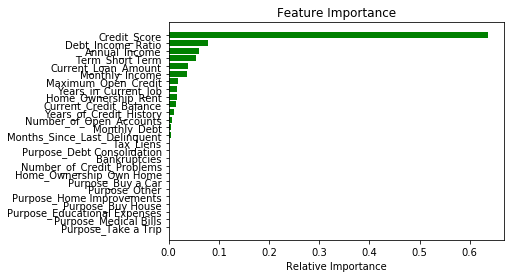

In [98]:
features = X.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')